# Freddie Mac Single Family Loan dataset analysis

For the dataset, I am utulising mechanical soup library to fetch the monthly performance files and sample files (these are a subset of 50,000 random loans from original dataset for every year)

## Part 1 - Data collection from website 

In [4]:
import mechanicalsoup as ms
import requests
from zipfile import ZipFile
import urllib
import os
from io import BytesIO
from urllib import request
from requests import get  
import glob
import pandas as pd
import sys
from pathlib import Path
from tempfile import mktemp
from os.path import basename
import time
import datetime

login = "mishr120@purdue.edu"
password = "zOv2JPiM"

def login(login,password):
    print("Login:" + str(login))    
    print("Pass:"+ str(password))
    url = "https://freddiemac.embs.com/FLoan/secure/login.php"
    url2 = "https://freddiemac.embs.com/FLoan/Data/downloadA.php"
    login = "mishr120@purdue.edu"
    password = "zOv2JPiM"
    s = requests.Session()
    browser = ms.Browser(session = s)
    print("Attempted login")

    login_page = browser.get(url)
    login_form = login_page.soup.find("form",{"class":"form"})
    login_form.find("input", {"name":"username"})["value"] = login
    login_form.find("input", {"name":"password"})["value"] = password
    response = browser.submit(login_form, login_page.url)
    login_page2 = browser.get(url2)
    print("Accepted Terms and Conditions")

    next_form = login_page2.soup.find("form",{"class":"fmform"})
    a= next_form.find("input",{"name": "accept"}).attrs
    a['checked']=True
    response2 = browser.submit(next_form, login_page2.url)
    print("Start Downloading from..."+ response2.url)
    table = response2.soup.find("table",{"class":"table1"})
    t = table.find_all('a')
    for x in range(24,48):
        c = 'https://freddiemac.embs.com/FLoan/Data/' + t[x]['href']
        r = s.get(c)
        z = ZipFile(BytesIO(r.content)) 
        z.extractall(os.getcwd())  

    print("All files downloaded")

def main():
    args = sys.argv[1:]
    counter = 0
    if len(args) == 0:
        print("Please provide login and password")
        exit(0)
    for arg in args:
        if counter == 0:
            username = str(arg)
        elif counter == 1:
            passw = str(arg)
        counter += 1
    print("Login:", login)
    print("Pass:", password)
    login(login,password)
        
        
main()

Login: <function login at 0x000001E93961F040>
Pass: zOv2JPiM
Login:<function login at 0x000001E93961F040>
Pass:zOv2JPiM
Attempted login
Accepted Terms and Conditions
Start Downloading from...https://freddiemac.embs.com/FLoan/Data/downloadA.php
All files downloaded


## Part 2 - Data wrangling and cleaning

I am using pandas library to append the datasets to form one file for each monthly performances and a separate one for origination files

I am calling appended origination files as frame and monthly performance files as frame 2

In [5]:
import pandas as pd
import glob
import os

path = r'C:\Users\Arjun' 
all_files = glob.glob(os.path.join(path , "sample_orig_*.txt"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = "|", index_col=None, header = None)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,618,200210,N,202902,10420.0,25,1,P,85,24,...,317,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
1,619,200303,N,201802,NaN,0,1,P,74,25,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
2,515,200303,N,202903,12700.0,0,1,S,78,32,...,313,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
3,649,199904,Y,202903,17820.0,999,1,P,95,46,...,360,1,Other sellers,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N
4,768,199905,N,202904,12980.0,0,1,P,75,21,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N


To get column names, I ran a concatenate function on the excel file which has the layout legend

In [7]:
frame.columns = ["Credit Score","First Payment Date","First Time Homebuyer Flag","Maturity Date",
                 "Metropolitan Statistical Area (MSA) Or Metropolitan Division",
                 "Mortgage Insurance Percentage (MI %)",
                 "Number of Units","Occupancy Status","Original Combined Loan-to-Value (CLTV)",
                 "Original Debt-to-Income (DTI) Ratio","Original UPB","Original Loan-to-Value (LTV)",
                 "Original Interest Rate","Channel","PPM Flag",
                 "Amortization Type (Formerly Product Type)","Property State","Property Type",
                 "Postal Code","Loan Sequence Number","Loan Purpose","Original Loan Term",
                 "Number of Borrowers","Seller Name","Servicer Name","Super Conforming Flag",
                 "Pre-HARP Loan Sequence Number","Program Indicator","HARP Indicator",
                 "Property Valuation Method","Interest Only (I/O) Indicator"]

In [8]:
frame.head()

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area (MSA) Or Metropolitan Division,Mortgage Insurance Percentage (MI %),Number of Units,Occupancy Status,Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,...,Original Loan Term,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only (I/O) Indicator
0,618,200210,N,202902,10420.0,25,1,P,85,24,...,317,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
1,619,200303,N,201802,NaN,0,1,P,74,25,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
2,515,200303,N,202903,12700.0,0,1,S,78,32,...,313,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
3,649,199904,Y,202903,17820.0,999,1,P,95,46,...,360,1,Other sellers,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N
4,768,199905,N,202904,12980.0,0,1,P,75,21,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N


In [9]:
def cleanorigin(data):
    data = data.drop(data['credit_score'].loc[(data['credit_score'] < 301) | (data['credit_score'] > 850)].index)
    data = data.dropna(subset=['credit_score'])
    data['First Time Homebuyer Flag'] = data['First Time Homebuyer Flag'].fillna("NA")
    data = data.dropna(subset=['Metropolitan Statistical Area (MSA) Or Metropolitan Division'])
    data['Mortgage Insurance Percentage (MI %)'] = data['Mortgage Insurance Percentage (MI %)'].fillna("NA")
    data['Original Combined Loan-to-Value (CLTV)'] = data['Original Combined Loan-to-Value (CLTV)'].fillna(0)
    data['Original Debt-to-Income (DTI) Ratio'] = data['Original Debt-to-Income (DTI) Ratio'].fillna(0)
    data['Original UPB","Original Loan-to-Value (LTV)'] = data['Original UPB","Original Loan-to-Value (LTV)'].fillna(0)
    data['Prepayment Penalty Mortgage (PPM) Flag'] = data['Prepayment Penalty Mortgage (PPM) Flag'].fillna("U")
    data = data.dropna(subset=['zipcode'])
    data['Number of Borrowers'] = data['Number of Borrowers'].fillna(1)
    data['Super Conforming Flag'] = data['Super Conforming Flag'].fillna("N")
    return data

In [12]:
path = r'C:\Users\Arjun' 
all_files = glob.glob(os.path.join(path , "sample_svcg_*.txt"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep = "|", index_col=None, header = None)
    li.append(df)

frame2 = pd.concat(li, axis=0, ignore_index=True)

C:\Users\Arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,7,23,24,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,24,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,7,23,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(

In [13]:
frame2.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,F99Q10000029,200209,122000.0,0,0,317,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0
1,F99Q10000029,200210,122000.0,0,1,316,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0
2,F99Q10000029,200211,121000.0,0,2,315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0
3,F99Q10000029,200212,121000.0,0,3,314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0
4,F99Q10000029,200301,121000.0,0,4,313,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0


In [15]:
frame2.columns = ["Loan Sequence Number","Monthly Reporting Period","Current Actual UPB",
                  "Current Loan Delinquency Status","Loan Age","Remaining Months to Legal Maturity",
                  "Defect Settlement Date","Modification Flag","Zero Balance Code",
                  "Zero Balance Effective Date","Current Interest Rate","Current Deferred UPB",
                  "DDLPI","MI Recoveries","Net Sales Proceeds","Non MI Recoveries","Expenses",
                  "Legal Costs","Maintenance and Preservation Costs","Taxes and Insurance",
                  "Miscellaneous Expenses","Actual Loss Calculation","Modification Cost",
                  "Step Modification Flag","Deferred Payment Plan","ELTV",
                  "Zero Balance Removal UPB","Delinquent Accrued Interest",
                  "Delinquency Due to Disaster","Borrower Assistance Status Code",
                  "Current Month Modification Cost","Interest Bearing UPB"]

frame2.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Defect Settlement Date,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Modification Cost,Step Modification Flag,Deferred Payment Plan,ELTV,Zero Balance Removal UPB,Delinquent Accrued Interest,Delinquency Due to Disaster,Borrower Assistance Status Code,Current Month Modification Cost,Interest Bearing UPB
0,F99Q10000029,200209,122000.0,0,0,317,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0
1,F99Q10000029,200210,122000.0,0,1,316,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0
2,F99Q10000029,200211,121000.0,0,2,315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0
3,F99Q10000029,200212,121000.0,0,3,314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0
4,F99Q10000029,200301,121000.0,0,4,313,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0


Creating an aggregate column for year to group both of the tables by

In [20]:
frame2['Year'] = frame2['Monthly Reporting Period']//100

In [21]:
frame2.head()

,Loan Sequence Number,Monthly Reporting Period,Current Actual UPB,Current Loan Delinquency Status,Loan Age,Remaining Months to Legal Maturity,Defect Settlement Date,Modification Flag,Zero Balance Code,Zero Balance Effective Date,...,Step Modification Flag,Deferred Payment Plan,ELTV,Zero Balance Removal UPB,Delinquent Accrued Interest,Delinquency Due to Disaster,Borrower Assistance Status Code,Current Month Modification Cost,Interest Bearing UPB,Year
0,F99Q10000029,200209,122000.0,0,0,317,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0,2002
1,F99Q10000029,200210,122000.0,0,1,316,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122000.0,2002
2,F99Q10000029,200211,121000.0,0,2,315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0,2002
3,F99Q10000029,200212,121000.0,0,3,314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0,2002
4,F99Q10000029,200301,121000.0,0,4,313,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121000.0,2003


In [52]:
data1 = frame2.groupby('Year').agg({'Current Actual UPB':'mean','Current Interest Rate':'mean',"Net Sales Proceeds":'mean',"Expenses":'mean',
                             "ELTV":'mean',"Legal Costs":'mean',"Maintenance and Preservation Costs":'mean',"Taxes and Insurance":'mean',
                  "Miscellaneous Expenses":'mean',"Actual Loss Calculation":'mean',
                        "Modification Cost":'mean',"Loan Sequence Number":'count',
    "Current Month Modification Cost":'mean',"Interest Bearing UPB":'mean'})

data1

,Current Actual UPB,Current Interest Rate,Net Sales Proceeds,Expenses,ELTV,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Miscellaneous Expenses,Actual Loss Calculation,Modification Cost,Loan Sequence Number,Current Month Modification Cost,Interest Bearing UPB
Year,,,,,,,,,,,,,,
1999,112817.429691,7.076305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232165,NaN,112817.429691
2000,114011.351502,7.629225,101751.638000,-1253.975000,NaN,-632.755000,-3.750000,-267.470000,-350.000000,552.888000,NaN,777279,-113.772121,114011.351502
2001,114142.718687,7.555355,52968.338103,-3261.158276,NaN,-996.269828,-1204.559828,-788.020862,-272.307759,-4224.271897,-718.168571,1226329,7.879501,114142.718687
2002,115869.242651,7.122503,71984.704757,-5053.300989,NaN,-1259.671593,-2170.714451,-1356.841484,-266.073462,-5823.596703,93.047037,1424769,49.569684,115869.242651
2003,112805.247064,6.562719,71115.039151,-6097.283150,NaN,-1584.923425,-2529.699606,-1690.029685,-292.630433,-8330.554865,999.460652,1348072,38.910992,112805.247064
2004,121239.498055,6.060104,60452.797305,-5569.994691,NaN,-1786.581636,-1929.913200,-1494.622509,-358.877345,-13032.482376,657.763478,1454504,20.445247,121239.498055
2005,129477.471770,5.890549,67202.688409,-7439.413731,NaN,-2213.184769,-2904.561731,-1890.443808,-431.223423,-18164.049621,637.235818,1778998,9.607378,129477.471770
2006,137828.463336,5.915490,80830.866516,-7909.232803,NaN,-2649.791423,-2824.190879,-1983.401381,-451.849121,-19349.077623,195.700667,2127754,2.581789,137828.463336
2007,143825.702952,6.007266,81252.753261,-8001.660852,NaN,-2643.227444,-2619.040630,-2339.574296,-399.818481,-23234.433261,1609.169474,2503818,2.360178,143825.702952


In [33]:
frame['Year'] = frame['First Payment Date']//100

In [34]:
data2 = frame.groupby('Year').agg({"Credit Score":'mean',"Mortgage Insurance Percentage (MI %)":'mean',
                           "Original Combined Loan-to-Value (CLTV)":'mean'
,"Original Debt-to-Income (DTI) Ratio":'mean',"Original UPB":'mean',"Original Loan-to-Value (LTV)":'mean',
                           "Original Interest Rate":'mean'})

data2

,Credit Score,Mortgage Insurance Percentage (MI %),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate
Year,,,,,,,
1999,777.468687,5.793521,70.875792,71.395716,114217.794614,70.789005,7.238946
2000,860.951631,6.212826,73.186743,56.740201,120948.758465,72.754504,8.169348
2001,771.816651,4.539218,72.073141,54.043928,136550.145767,71.501319,7.100649
2002,766.130815,3.305992,69.251782,50.501428,141372.807614,68.598427,6.487331
2003,781.709795,2.433431,66.881434,50.375560,144215.392817,65.861512,5.527346
2004,731.499176,3.317759,70.494193,51.675590,152044.973436,69.086199,5.678561
2005,731.953277,2.976599,70.705576,63.034541,168029.196793,69.117141,5.721047
2006,730.935978,3.241305,72.345466,58.054154,176497.613848,69.962307,6.392054
2007,731.537674,4.588547,74.183708,56.798292,181366.253082,71.279962,6.364881


In [80]:
data3 = data1.merge(data2, on = 'Year')
data3

,Current Actual UPB,Current Interest Rate,Net Sales Proceeds,Expenses,ELTV,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Miscellaneous Expenses,Actual Loss Calculation,...,Loan Sequence Number,Current Month Modification Cost,Interest Bearing UPB,Credit Score,Mortgage Insurance Percentage (MI %),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate
Year,,,,,,,,,,,,,,,,,,,,,
1999,112817.429691,7.076305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232165,NaN,112817.429691,777.468687,5.793521,70.875792,71.395716,114217.794614,70.789005,7.238946
2000,114011.351502,7.629225,101751.638000,-1253.975000,NaN,-632.755000,-3.750000,-267.470000,-350.000000,552.888000,...,777279,-113.772121,114011.351502,860.951631,6.212826,73.186743,56.740201,120948.758465,72.754504,8.169348
2001,114142.718687,7.555355,52968.338103,-3261.158276,NaN,-996.269828,-1204.559828,-788.020862,-272.307759,-4224.271897,...,1226329,7.879501,114142.718687,771.816651,4.539218,72.073141,54.043928,136550.145767,71.501319,7.100649
2002,115869.242651,7.122503,71984.704757,-5053.300989,NaN,-1259.671593,-2170.714451,-1356.841484,-266.073462,-5823.596703,...,1424769,49.569684,115869.242651,766.130815,3.305992,69.251782,50.501428,141372.807614,68.598427,6.487331
2003,112805.247064,6.562719,71115.039151,-6097.283150,NaN,-1584.923425,-2529.699606,-1690.029685,-292.630433,-8330.554865,...,1348072,38.910992,112805.247064,781.709795,2.433431,66.881434,50.375560,144215.392817,65.861512,5.527346
2004,121239.498055,6.060104,60452.797305,-5569.994691,NaN,-1786.581636,-1929.913200,-1494.622509,-358.877345,-13032.482376,...,1454504,20.445247,121239.498055,731.499176,3.317759,70.494193,51.675590,152044.973436,69.086199,5.678561
2005,129477.471770,5.890549,67202.688409,-7439.413731,NaN,-2213.184769,-2904.561731,-1890.443808,-431.223423,-18164.049621,...,1778998,9.607378,129477.471770,731.953277,2.976599,70.705576,63.034541,168029.196793,69.117141,5.721047
2006,137828.463336,5.915490,80830.866516,-7909.232803,NaN,-2649.791423,-2824.190879,-1983.401381,-451.849121,-19349.077623,...,2127754,2.581789,137828.463336,730.935978,3.241305,72.345466,58.054154,176497.613848,69.962307,6.392054
2007,143825.702952,6.007266,81252.753261,-8001.660852,NaN,-2643.227444,-2619.040630,-2339.574296,-399.818481,-23234.433261,...,2503818,2.360178,143825.702952,731.537674,4.588547,74.183708,56.798292,181366.253082,71.279962,6.364881


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [81]:
data3.shape

(24, 21)

In [148]:
data3.reset_index(inplace = True)
data3.rename(columns = {'index':'Year'}, inplace = True)

data3

,Year,Current Actual UPB,Current Interest Rate,Net Sales Proceeds,Expenses,ELTV,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Miscellaneous Expenses,...,Loan Sequence Number,Current Month Modification Cost,Interest Bearing UPB,Credit Score,Mortgage Insurance Percentage (MI %),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate
0,1999,112817.429691,7.076305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232165,NaN,112817.429691,777.468687,5.793521,70.875792,71.395716,114217.794614,70.789005,7.238946
1,2000,114011.351502,7.629225,101751.638000,-1253.975000,NaN,-632.755000,-3.750000,-267.470000,-350.000000,...,777279,-113.772121,114011.351502,860.951631,6.212826,73.186743,56.740201,120948.758465,72.754504,8.169348
2,2001,114142.718687,7.555355,52968.338103,-3261.158276,NaN,-996.269828,-1204.559828,-788.020862,-272.307759,...,1226329,7.879501,114142.718687,771.816651,4.539218,72.073141,54.043928,136550.145767,71.501319,7.100649
3,2002,115869.242651,7.122503,71984.704757,-5053.300989,NaN,-1259.671593,-2170.714451,-1356.841484,-266.073462,...,1424769,49.569684,115869.242651,766.130815,3.305992,69.251782,50.501428,141372.807614,68.598427,6.487331
4,2003,112805.247064,6.562719,71115.039151,-6097.283150,NaN,-1584.923425,-2529.699606,-1690.029685,-292.630433,...,1348072,38.910992,112805.247064,781.709795,2.433431,66.881434,50.375560,144215.392817,65.861512,5.527346
5,2004,121239.498055,6.060104,60452.797305,-5569.994691,NaN,-1786.581636,-1929.913200,-1494.622509,-358.877345,...,1454504,20.445247,121239.498055,731.499176,3.317759,70.494193,51.675590,152044.973436,69.086199,5.678561
6,2005,129477.471770,5.890549,67202.688409,-7439.413731,NaN,-2213.184769,-2904.561731,-1890.443808,-431.223423,...,1778998,9.607378,129477.471770,731.953277,2.976599,70.705576,63.034541,168029.196793,69.117141,5.721047
7,2006,137828.463336,5.915490,80830.866516,-7909.232803,NaN,-2649.791423,-2824.190879,-1983.401381,-451.849121,...,2127754,2.581789,137828.463336,730.935978,3.241305,72.345466,58.054154,176497.613848,69.962307,6.392054
8,2007,143825.702952,6.007266,81252.753261,-8001.660852,NaN,-2643.227444,-2619.040630,-2339.574296,-399.818481,...,2503818,2.360178,143825.702952,731.537674,4.588547,74.183708,56.798292,181366.253082,71.279962,6.364881
9,2008,149593.162789,6.041144,87567.333563,-6938.576286,NaN,-2308.390490,-2005.647388,-2214.310694,-410.227714,...,2872275,15.003295,149593.162789,745.937505,4.712904,71.756116,58.898006,201690.146159,70.414469,6.131818


## Part 2: EDA

### For EDA, I will be using Seaborn Lineplots to observe YoY trends for various columns in our appended dataframe

In [150]:
data3.head()

,Year,Current Actual UPB,Current Interest Rate,Net Sales Proceeds,Expenses,ELTV,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Miscellaneous Expenses,...,Loan Sequence Number,Current Month Modification Cost,Interest Bearing UPB,Credit Score,Mortgage Insurance Percentage (MI %),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate
0,1999,112817.429691,7.076305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,232165,NaN,112817.429691,777.468687,5.793521,70.875792,71.395716,114217.794614,70.789005,7.238946
1,2000,114011.351502,7.629225,101751.638000,-1253.975000,NaN,-632.755000,-3.750000,-267.470000,-350.000000,...,777279,-113.772121,114011.351502,860.951631,6.212826,73.186743,56.740201,120948.758465,72.754504,8.169348
2,2001,114142.718687,7.555355,52968.338103,-3261.158276,NaN,-996.269828,-1204.559828,-788.020862,-272.307759,...,1226329,7.879501,114142.718687,771.816651,4.539218,72.073141,54.043928,136550.145767,71.501319,7.100649
3,2002,115869.242651,7.122503,71984.704757,-5053.300989,NaN,-1259.671593,-2170.714451,-1356.841484,-266.073462,...,1424769,49.569684,115869.242651,766.130815,3.305992,69.251782,50.501428,141372.807614,68.598427,6.487331
4,2003,112805.247064,6.562719,71115.039151,-6097.283150,NaN,-1584.923425,-2529.699606,-1690.029685,-292.630433,...,1348072,38.910992,112805.247064,781.709795,2.433431,66.881434,50.375560,144215.392817,65.861512,5.527346


C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Credit Score'>

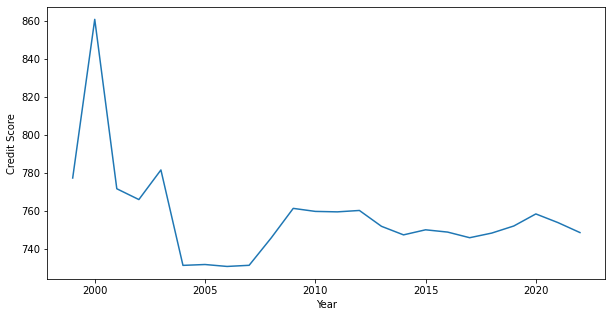

In [149]:
plt.figure(figsize=(10,5))
sns.lineplot('Year','Credit Score', data=data3)

This plot shows that the credit score for which a loan is approved has has seen a downward trend meaning thereby that the loans are getting approved at lower credit score. The lowest point in this graph coincided with the housing crash of 2008.

During 2000, the average credit score required for a housing loan as a single family was at an all time high.

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Loan Sequence Number'>

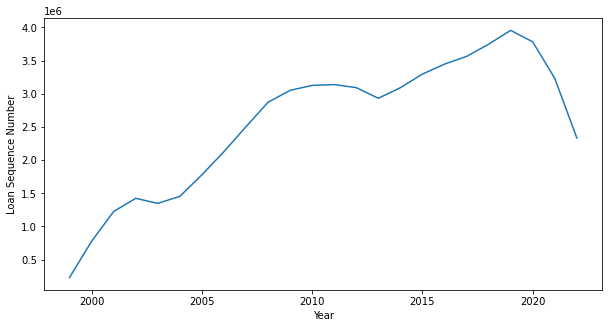

In [151]:
plt.figure(figsize=(10,5))
sns.lineplot('Year','Loan Sequence Number', data=data3)

This line plot shows that the number of housing loans in the market have grown YoY only seeing a downward trend during the covid pandemic where potential homebuyers dropped in numbers

In [152]:
data3['Net Revenue'] = data3['Net Sales Proceeds'] + data3['Expenses']
+ data3['Legal Costs'] + data3['Maintenance and Preservation Costs']
+ data3['Taxes and Insurance'] + data3['Miscellaneous Expenses']

data3

,Year,Current Actual UPB,Current Interest Rate,Net Sales Proceeds,Expenses,ELTV,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Miscellaneous Expenses,...,Current Month Modification Cost,Interest Bearing UPB,Credit Score,Mortgage Insurance Percentage (MI %),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate,Net Revenue
0,1999,112817.429691,7.076305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,112817.429691,777.468687,5.793521,70.875792,71.395716,114217.794614,70.789005,7.238946,NaN
1,2000,114011.351502,7.629225,101751.638000,-1253.975000,NaN,-632.755000,-3.750000,-267.470000,-350.000000,...,-113.772121,114011.351502,860.951631,6.212826,73.186743,56.740201,120948.758465,72.754504,8.169348,100497.663000
2,2001,114142.718687,7.555355,52968.338103,-3261.158276,NaN,-996.269828,-1204.559828,-788.020862,-272.307759,...,7.879501,114142.718687,771.816651,4.539218,72.073141,54.043928,136550.145767,71.501319,7.100649,49707.179828
3,2002,115869.242651,7.122503,71984.704757,-5053.300989,NaN,-1259.671593,-2170.714451,-1356.841484,-266.073462,...,49.569684,115869.242651,766.130815,3.305992,69.251782,50.501428,141372.807614,68.598427,6.487331,66931.403768
4,2003,112805.247064,6.562719,71115.039151,-6097.283150,NaN,-1584.923425,-2529.699606,-1690.029685,-292.630433,...,38.910992,112805.247064,781.709795,2.433431,66.881434,50.375560,144215.392817,65.861512,5.527346,65017.756001
5,2004,121239.498055,6.060104,60452.797305,-5569.994691,NaN,-1786.581636,-1929.913200,-1494.622509,-358.877345,...,20.445247,121239.498055,731.499176,3.317759,70.494193,51.675590,152044.973436,69.086199,5.678561,54882.802614
6,2005,129477.471770,5.890549,67202.688409,-7439.413731,NaN,-2213.184769,-2904.561731,-1890.443808,-431.223423,...,9.607378,129477.471770,731.953277,2.976599,70.705576,63.034541,168029.196793,69.117141,5.721047,59763.274678
7,2006,137828.463336,5.915490,80830.866516,-7909.232803,NaN,-2649.791423,-2824.190879,-1983.401381,-451.849121,...,2.581789,137828.463336,730.935978,3.241305,72.345466,58.054154,176497.613848,69.962307,6.392054,72921.633713
8,2007,143825.702952,6.007266,81252.753261,-8001.660852,NaN,-2643.227444,-2619.040630,-2339.574296,-399.818481,...,2.360178,143825.702952,731.537674,4.588547,74.183708,56.798292,181366.253082,71.279962,6.364881,73251.092409
9,2008,149593.162789,6.041144,87567.333563,-6938.576286,NaN,-2308.390490,-2005.647388,-2214.310694,-410.227714,...,15.003295,149593.162789,745.937505,4.712904,71.756116,58.898006,201690.146159,70.414469,6.131818,80628.757277


C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Actual Loss Calculation'>

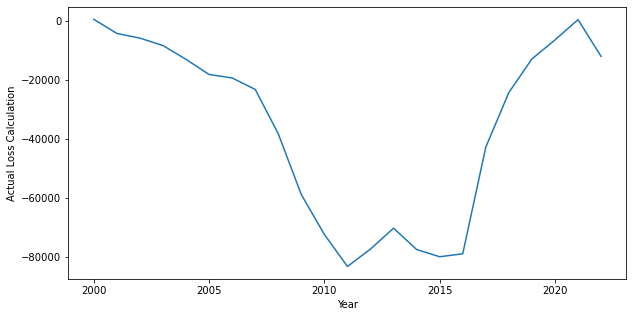

In [153]:
plt.figure(figsize=(10,5))
sns.lineplot('Year','Actual Loss Calculation', data=data3)

In [156]:
data3['Interest Rate Difference'] = data3['Original Interest Rate'] - data3['Current Interest Rate']

<AxesSubplot:xlabel='Year', ylabel='Interest Rate Difference'>

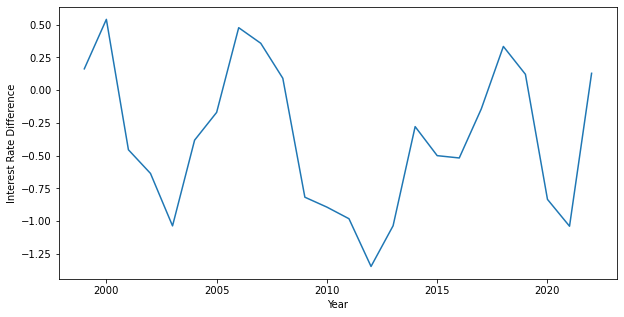

In [162]:
plt.figure(figsize=(10,5))
sns.lineplot('Year','Interest Rate Difference', data=data3)

This graph shows that there is some level of periodicity in the variance of difference between original interest rates and current interest and looking at the trend, it is possible that the difference between the two is going to go down in the coming years.

This can ecourage investors to hold a short position against mortgage backed securities.

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Original Interest Rate'>

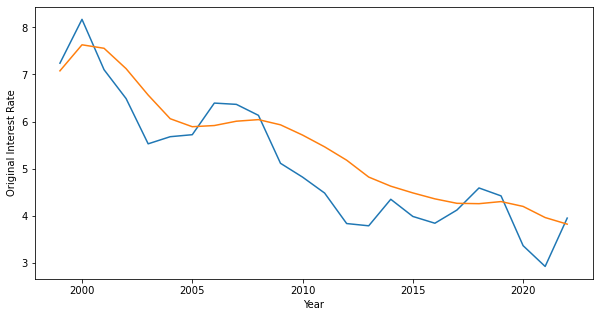

In [158]:
plt.figure(figsize=(10,5))
sns.lineplot('Year','Original Interest Rate', data=data3)
sns.lineplot('Year','Current Interest Rate', data=data3)

Here we see the direct relationship between current interest rate and the original interest rate as both of these YoY negative growth. 

This fall in interest rates is a targeted towards potential homebuyers encouraging them to purchase homes either as investment properties or for personal use.

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Net Sales Proceeds'>

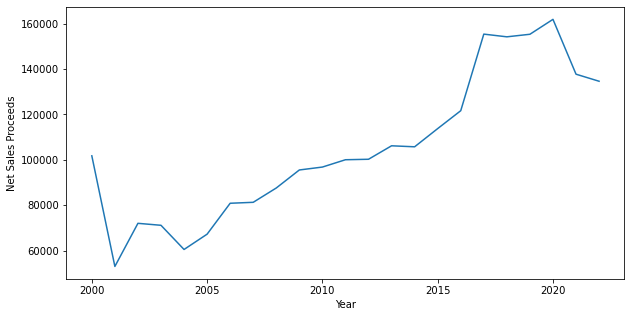

In [159]:
plt.figure(figsize=(10,5))

sns.lineplot('Year','Net Sales Proceeds', data=data3)

A positive trend in Sales proceeds indicates that mortgage bakced securities market has been a safe bet for investments in the market. This trend is somewhat similar to S&P500's index fund.

However, it did take a hit during the Pandemic like many other options in the securities and stock market - It also shows signs of improvement as time passes by

<Figure size 432x288 with 0 Axes>

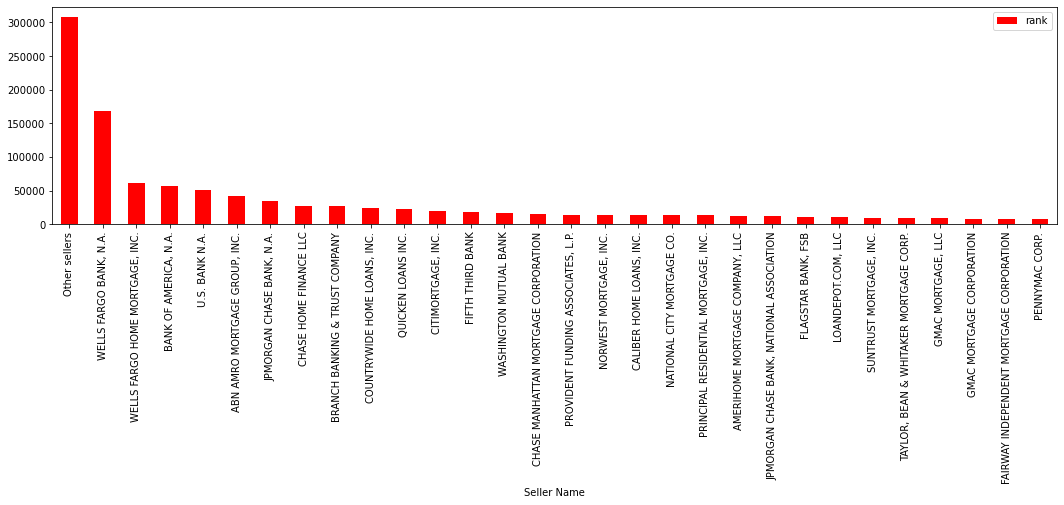

<Figure size 432x288 with 0 Axes>

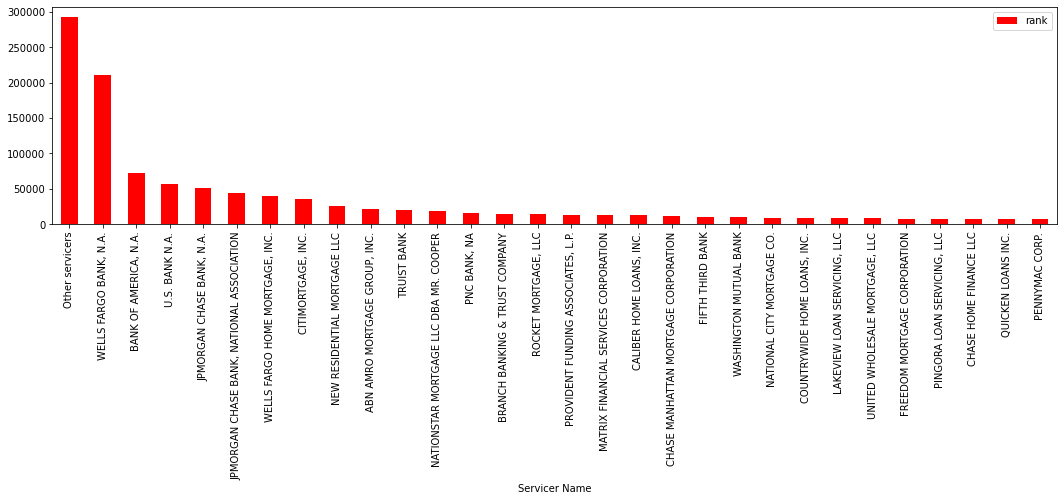

In [282]:
def plot_ranking_graph(frame):
    plt.figure() 
    frame.head(n=30).plot(figsize=(18,4), kind='bar', color = 'r')

RankSellers = pd.DataFrame()
RankSellers['rank'] = frame['Loan Sequence Number'].groupby(frame['Seller Name']).count().sort_values(ascending = False)
plot_ranking_graph(RankSellers)

RankServicer = pd.DataFrame()
RankServicer['rank'] = frame['Loan Sequence Number'].groupby(frame['Servicer Name']).count().sort_values(ascending = False)
plot_ranking_graph(RankServicer)

Ranking wise, Wells Fargo is the single most prolific seller and servicer for Freddie Mac

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Original UPB'>

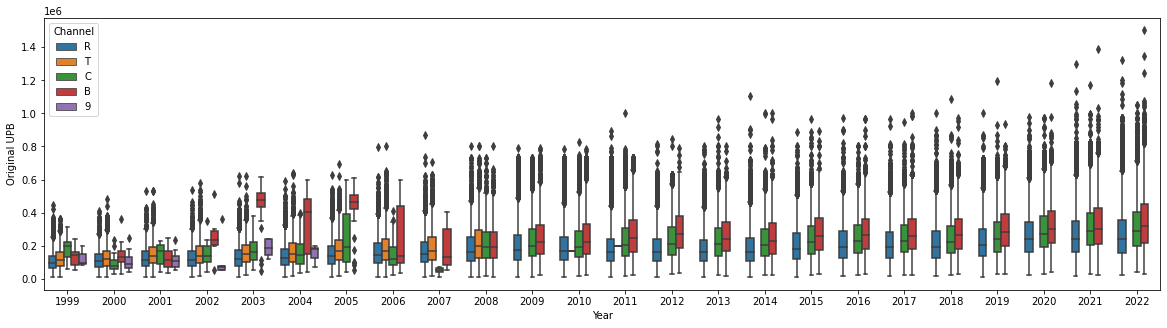

In [176]:
plt.figure(figsize = (20,5))
sns.boxplot('Year', 'Original UPB', hue = "Channel", data = frame)

These boxplots show that most of the loans for investment properties had less unpaid balance showing that the buyers who can afford to purchase multiple homes are often in a position to pay off the loans in a timely manner. A probable cause for this is a higher personal disposable income available to this sector.

This shows that the people at this economic level could be targeted for JPMC private bank's sales strategies.

## To have a proactive impact on the dataset, we need a  prediction mechanism to find the correlation matrix and choose which ML Algorithm to choose for high accuracy

In [180]:
data3.corr()

,Year,Current Actual UPB,Current Interest Rate,Net Sales Proceeds,Expenses,ELTV,Legal Costs,Maintenance and Preservation Costs,Taxes and Insurance,Miscellaneous Expenses,...,Interest Bearing UPB,Credit Score,Mortgage Insurance Percentage (MI %),Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate,Net Revenue,Interest Rate Difference
Year,1.000000,0.977052,-0.971612,0.888191,-0.343322,-0.907368,-0.236893,-0.190236,-0.389138,-0.788787,...,0.976603,-0.380200,0.476391,0.395952,0.066673,0.971493,0.464624,-0.895218,0.833210,-0.160222
Current Actual UPB,0.977052,1.000000,-0.942722,0.863260,-0.341164,-0.664977,-0.284078,-0.182604,-0.380160,-0.731086,...,0.999990,-0.399859,0.443463,0.418573,0.121594,0.964440,0.458610,-0.840285,0.808342,-0.085787
Current Interest Rate,-0.971612,-0.942722,1.000000,-0.818059,0.467432,0.757952,0.380737,0.338083,0.489913,0.825876,...,-0.941957,0.498013,-0.446404,-0.432149,-0.099363,-0.922211,-0.477023,0.915763,-0.737503,0.151097
Net Sales Proceeds,0.888191,0.863260,-0.818059,1.000000,-0.170608,0.564995,-0.046955,-0.016950,-0.232168,-0.681096,...,0.863304,-0.026991,0.702313,0.402650,-0.083422,0.827412,0.547544,-0.677661,0.980816,0.073538
Expenses,-0.343322,-0.341164,0.467432,-0.170608,1.000000,-0.524447,0.950529,0.950338,0.984099,0.670466,...,-0.338393,0.314659,-0.144714,-0.514432,-0.433955,-0.219855,-0.450366,0.500550,0.024741,0.226588
ELTV,-0.907368,-0.664977,0.757952,0.564995,-0.524447,1.000000,-0.529051,-0.622701,-0.444317,0.238822,...,-0.665134,-0.491216,0.654570,0.810097,0.669618,-0.941508,0.795689,0.664133,0.420325,0.488913
Legal Costs,-0.236893,-0.284078,0.380737,-0.046955,0.950529,-0.529051,1.000000,0.903842,0.918571,0.494788,...,-0.282205,0.423212,0.017842,-0.447204,-0.462586,-0.150327,-0.322247,0.399653,0.140408,0.165461
Maintenance and Preservation Costs,-0.190236,-0.182604,0.338083,-0.016950,0.950338,-0.622701,0.903842,1.000000,0.885456,0.561800,...,-0.179876,0.345436,-0.037380,-0.515463,-0.491867,-0.051578,-0.414191,0.393183,0.170812,0.237702
Taxes and Insurance,-0.389138,-0.380160,0.489913,-0.232168,0.984099,-0.444317,0.918571,0.885456,1.000000,0.693236,...,-0.377309,0.237148,-0.191156,-0.482208,-0.393662,-0.273364,-0.448563,0.529124,-0.040862,0.248152
Miscellaneous Expenses,-0.788787,-0.731086,0.825876,-0.681096,0.670466,0.238822,0.494788,0.561800,0.693236,1.000000,...,-0.728581,0.252797,-0.681871,-0.553222,-0.004067,-0.676275,-0.657776,0.690715,-0.558377,-0.058649


Simple correlation matrix of the dataset shows inconclusive evidence of high correlation. For example, CLTV and LTV have high correlation but we need to dive deeper to figure out which module can be used to create an effective prediction mechanism in terms of future interest rates.

# Part 3: Using H2O.ai to find the best ensemble to predict future values

I will use a cloud based repository called H2o.ai which will use build many prediction models to find the best match without any preprocessing.

This AutoML trains random forests, gradient boositng models, neural networks, GLM to optimise performance.

In [229]:
from sklearn.metrics import *
from IPython.core.display import HTML

import sys
import os
import time
import zipfile
import datetime
import glob
import pandas as pd
import numpy as np

In [193]:
import h2o
from h2o.automl import H2OAutoML

In [197]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\Arjun\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Arjun\AppData\Local\Temp\tmpywr6uxe9
  JVM stdout: C:\Users\Arjun\AppData\Local\Temp\tmpywr6uxe9\h2o_Arjun_started_from_python.out
  JVM stderr: C:\Users\Arjun\AppData\Local\Temp\tmpywr6uxe9\h2o_Arjun_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_Arjun_yf3o3h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.957 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [259]:
training_frame = h2o.import_file('sample_orig_2021.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [260]:
training_frame.describe()

Rows:50000
Cols:31

,﻿Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area (MSA) Or Metropolitan Division,Mortgage Insurance Percentage (MI %),Number of Units,Occupancy Status,Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate,Channel,Prepayment Penalty Mortgage (PPM) Flag,Amortization Type (Formerly Product Type),Property State,Property Type,Postal Code,Loan Sequence Number,Loan Purpose,Original Loan Term,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only (I/O) Indicator
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,int,int,int,int,enum
mins,601.0,202102.0,,202808.0,10180.0,0.0,1.0,,6.0,1.0,18000.0,6.0,1.625,,,,,,600.0,NaN,,85.0,1.0,,,,NaN,9.0,NaN,1.0,
mean,753.68076,202122.48948,,204768.77686000007,30286.16905538172,4.966059999999999,1.0270200000000003,,69.49764,34.13055999999999,288818.11999999994,69.30543999999998,2.9719974199999997,,,,,,54095.43599999998,NaN,,318.53634000000005,1.4721000000000006,,,,0.0,9.0,0.0,1.64362,
maxs,9999.0,202209.0,,205208.0,49740.0,35.0,4.0,,105.0,999.0,1392000.0,101.0,5.5,,,,,,99900.0,NaN,,360.0,4.0,,,,NaN,9.0,NaN,9.0,
sigma,166.38919746522933,34.40711330983342,,614.0752519657793,11244.753399210515,10.401924441036934,0.2108336040961505,,17.646945988596848,14.95948895559592,149002.48143724015,17.684488152865054,0.4183579280478176,,,,,,29890.8916641507,NaN,,73.54566784460913,0.5170947086741023,,,,-0.0,0.0,-0.0,0.5224354068926487,
zeros,0,0,,0,0,39986,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,0,0,0,0,
missing,0,0,0,0,4299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48228,50000,1706,50000,0,0
0,776.0,202103.0,N,205102.0,nan,0.0,1.0,P,52.0,12.0,68000.0,52.0,2.5,R,N,FRM,IL,SF,61300.0,F21Q11275826,N,360.0,1.0,Other sellers,Other servicers,,nan,9.0,nan,3.0,N
1,746.0,202103.0,N,205102.0,nan,30.0,1.0,P,95.0,33.0,76000.0,95.0,2.875,R,N,FRM,NY,SF,14800.0,F21Q11275887,P,360.0,1.0,Other sellers,Other servicers,,nan,9.0,nan,2.0,N
2,710.0,202103.0,N,204102.0,nan,0.0,1.0,P,65.0,50.0,90000.0,65.0,2.875,R,N,FRM,IL,SF,61300.0,F21Q11275971,C,240.0,1.0,Other sellers,Other servicers,,nan,9.0,nan,2.0,N


In [261]:
training_frame = training_frame.head(10000)

In [262]:
testing_frame = h2o.import_file('sample_orig_2022.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [263]:
testing_frame = test_data.head(10000)

In [264]:
X = training_frame.columns
y = 'Original Interest Rate'
X.remove(y)

#Unnecessary Columns
X.remove('Maturity Date')
X.remove('Servicer Name')
X.remove('Seller Name')
X.remove('Loan Sequence Number')
X.remove('Postal Code')

In [265]:
training_frame.head()

﻿Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area (MSA) Or Metropolitan Division,Mortgage Insurance Percentage (MI %),Number of Units,Occupancy Status,Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,Original UPB,Original Loan-to-Value (LTV),Original Interest Rate,Channel,Prepayment Penalty Mortgage (PPM) Flag,Amortization Type (Formerly Product Type),Property State,Property Type,Postal Code,Loan Sequence Number,Loan Purpose,Original Loan Term,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only (I/O) Indicator
776,202103,N,205102,nan,0,1,P,52,12,68000,52,2.5,R,N,FRM,IL,SF,61300,F21Q11275826,N,360,1,Other sellers,Other servicers,,nan,9,nan,3,N
746,202103,N,205102,nan,30,1,P,95,33,76000,95,2.875,R,N,FRM,NY,SF,14800,F21Q11275887,P,360,1,Other sellers,Other servicers,,nan,9,nan,2,N
710,202103,N,204102,nan,0,1,P,65,50,90000,65,2.875,R,N,FRM,IL,SF,61300,F21Q11275971,C,240,1,Other sellers,Other servicers,,nan,9,nan,2,N
722,202103,N,205102,16984,25,1,P,89,40,353000,89,2.875,R,N,FRM,IL,PU,60500,F21Q11276042,N,360,2,Other sellers,Other servicers,,nan,9,nan,1,N
761,202103,N,205102,29020,0,1,P,56,50,128000,56,2.75,R,N,FRM,IN,SF,46900,F21Q11276052,C,360,1,Other sellers,Other servicers,,nan,9,nan,2,N
675,202103,N,203602,nan,0,1,P,37,27,47000,37,2.625,R,N,FRM,PA,SF,17700,F21Q11276063,N,180,1,Other sellers,Other servicers,,nan,9,nan,2,N
799,202103,N,205102,17140,0,1,P,64,18,290000,64,2.875,R,N,FRM,OH,SF,45100,F21Q11276153,N,360,2,Other sellers,Other servicers,,nan,9,nan,1,N
785,202103,N,205102,33340,0,1,P,75,30,313000,75,2.875,R,N,FRM,WI,SF,53100,F21Q11276176,N,360,2,Other sellers,Other servicers,,nan,9,nan,1,N
692,202103,N,203602,41180,0,1,P,70,32,185000,70,2.875,R,N,FRM,IL,SF,62200,F21Q11276194,C,180,2,Other sellers,Other servicers,,nan,9,nan,2,N
688,202103,N,204102,nan,25,1,P,95,42,158000,95,2.5,R,N,FRM,MI,SF,49800,F21Q11276274,N,240,2,Other sellers,Other servicers,,nan,9,nan,2,N


In [269]:
model = H2OAutoML(max_runtime_secs = 300)

In [270]:
model.train(x = X, y = y, training_frame = training_frame, leaderboard_frame = testing_frame)

AutoML progress: |
08:35:13.648: AutoML: XGBoost is not available; skipping it.
08:35:13.651: _train param, Dropping bad and constant columns: [Program Indicator, Pre-HARP Loan Sequence Number, HARP Indicator, Prepayment Penalty Mortgage (PPM) Flag, Interest Only (I/O) Indicator, Amortization Type (Formerly Product Type), Super Conforming Flag]


08:35:14.46: _train param, Dropping bad and constant columns: [Interest Only (I/O) Indicator, Amortization Type (Formerly Product Type), Pre-HARP Loan Sequence Number, HARP Indicator, Prepayment Penalty Mortgage (PPM) Flag]

█
08:35:17.134: _train param, Dropping unused columns: [Interest Only (I/O) Indicator, Amortization Type (Formerly Product Type), Pre-HARP Loan Sequence Number, HARP Indicator, Prepayment Penalty Mortgage (PPM) Flag]

█
08:35:17.422: _train param, Dropping bad and constant columns: [Interest Only (I/O) Indicator, Amortization Type (Formerly Product Type), Pre-HARP Loan Sequence Number, HARP Indicator, Prepayment Penalty Mo

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1686670,0.0032550,0.1741265,0.1677285,0.1669767,0.1688057,0.1656977
mean_residual_deviance,0.0524729,0.0038999,0.0587746,0.0519425,0.0491345,0.0530920,0.0494208
mse,0.0524729,0.0038999,0.0587746,0.0519425,0.0491345,0.0530920,0.0494208
null_deviance,218.73396,13.316111,236.06107,220.28047,209.70996,225.5717,202.04662
r2,0.5204205,0.0155122,0.5052595,0.505842,0.5424166,0.5260687,0.5225159
residual_deviance,104.9815750,8.824538,116.78523,108.81949,95.95965,106.87412,96.469406
rmse,0.2289463,0.0084008,0.2424348,0.2279089,0.221663,0.2304169,0.2223079
rmsle,0.0592086,0.0014202,0.0614157,0.0595364,0.0581679,0.0591289,0.0577944


In [271]:
model.leaderboard.as_data_frame()

,model_id,rmse,mse,mae,rmsle,mean_residual_deviance
0,StackedEnsemble_AllModels_4_AutoML_4_20230130_...,0.438610,0.192379,0.353167,0.098640,0.192379
1,StackedEnsemble_BestOfFamily_5_AutoML_4_202301...,0.452967,0.205179,0.369377,0.104133,0.205179
2,DeepLearning_grid_3_AutoML_4_20230130_83513_mo...,0.567838,0.322440,0.463183,0.131606,0.322440
3,StackedEnsemble_BestOfFamily_3_AutoML_4_202301...,0.594175,0.353043,0.476484,0.131612,0.353043
4,StackedEnsemble_AllModels_2_AutoML_4_20230130_...,0.607162,0.368645,0.489122,0.134809,0.368645
...,...,...,...,...,...,...
56,DeepLearning_grid_2_AutoML_4_20230130_83513_mo...,1.223523,1.497010,1.113573,0.300336,1.497010
57,GLM_1_AutoML_4_20230130_83513,1.409187,1.985807,1.331934,NaN,1.985807
58,DeepLearning_1_AutoML_4_20230130_83513,1.583229,2.506613,1.509842,0.317855,2.506613
59,DeepLearning_grid_1_AutoML_4_20230130_83513_mo...,1.601529,2.564894,1.546658,0.318509,2.564894


## The ensemble with lowest root mean square error can be chosen if computational complexity, speed and accuracy are consistent for all. However, just for demonstration purposes I only selected two files - for extensive ensembling, feature engineering and  hyperparameter tuning will take place.

Preliminary analysis indicates that Random Forest will be likely to produce the best results since it does not require cross validation and can increase the speed. It is also highly resistive to over training and can handle data wihtout pre processing.